# ReadTwoFishStimliEqualDis_Bifurcation_Vivek

In [1]:
# import system libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt### virtual fish swims with 0.12 m  circle without background

import pickle
import matplotlib
from copy import deepcopy

plt.style.use('paper')
%matplotlib inline

# read real fish data

In [2]:
ReadData = True
    
"""
Read saved data
"""
if ReadData:
    filename  = '../Data/fish/2VF_Bifurcation_data'
    infile    = open(filename,'rb')
    new_dict  = pickle.load(infile)
    Results   = new_dict['Results']
    Xs        = new_dict['Xs']
    Ys        = new_dict['Ys']
    infile.close()
#     print(new_dict)
    

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


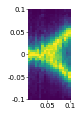

In [3]:

Rotate=False
Results_new = deepcopy(Results)

y = np.linspace(-0.1,0.1,50)
Speeds = np.arange(1.0,1.01,0.25)
LRDs   = np.arange(0.01,0.12,0.005)
ilmax  = 20


matplotlib.rcParams.update({'font.size': 8})

iLRDs = len(LRDs)
if Rotate:
    fig1, ax1 = plt.subplots(nrows=1,ncols=len(Speeds),sharex=True,sharey=True,figsize=(6.9/5.*len(Speeds),3.35/5.))
    ax1.invert_yaxis()  # Invert y axis
else:
    fig1, ax1 = plt.subplots(nrows=1,ncols=len(Speeds),sharex=True,sharey=True,figsize=(0.6*len(Speeds),1.40))
ifig = 1


AllBranchPlots = []

Result_filter = np.zeros((50,iLRDs))
for ilrd, lrd in enumerate(LRDs):

    aaa = np.mean(Results_new[:,:,ilrd],axis=1)
    Result_filter[:,ilrd] =  (aaa - np.min(aaa))/(np.max(aaa) - np.min(aaa))

x = np.append(LRDs,LRDs[-1]+np.diff(LRDs)[0])-0.5*np.diff(LRDs)[0]

z = Result_filter

if Rotate:
    ax1.pcolor(y,x,z.T,rasterized=True)

else:
    ax1.pcolor(x[:ilmax],y,z[:,:ilmax],rasterized=True)

AllBranchPlots.append(Result_filter)
TLabel = []
x1 = x
y1 = x1/2.0
y2 = -y1


#     ax1.set_title('Speed '+ str(round(Speeds[ispeed]*0.04,3)) + '(m/s)')
ax1.tick_params(pad=1)

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)



#     ax1.set_xlim([0,0.12])
ax1.set_xticks([0,0.05,0.1])
ax1.set_xticklabels(['0','0.05','0.1'])
ax1.set_yticks([-0.1,-0.05,0,0.05,0.1])
ax1.set_yticklabels(['-0.1','-0.05','0','0.05','0.1'])

ax1.axis('equal')
    
    


if Rotate:
    fig1.text(0.5,-0.35, r'$LRD_{RealFish_to_Center}$ (m)', ha="center", va="center",fontsize = 8)
    fig1.text(0.07,0.5, r'$LRD_{VirtualFish}$ (m)', ha="center", va="center", rotation=90,fontsize = 8)
else:
    fig1.subplots_adjust(left=0.01, right=1,  bottom=0.1,  top=1.0, wspace=0.1, hspace=0)

fig1.show()


# read simulation data

In [4]:
fn = 'fishdata_n2_20200525'

df = pd.read_csv('../Data/fish/'+fn+'.csv')
# df = pd.read_csv('./Data_VivekSimulation/geometry_3VF_MN.csv')
print(df.head())
print(df.keys())

print(np.max(df[' x'].values))
print(np.max(df[' y'].values))
print(np.min(df[' y'].values))


   time         x        y   left_right_distance   front_back_distance
0    10 -0.032238  500.023                     0                  75.0
1    20 -0.032238  500.037                     0                  75.0
2    30 -0.032238  500.035                     0                  75.0
3    40 -0.032238  500.041                     0                  75.0
4    50 -0.032238  500.054                     0                  75.0
Index(['time', ' x', ' y', ' left_right_distance', ' front_back_distance'], dtype='object')
0.119822
744.3489999999999
256.999


In [5]:
a_lrds = df[' left_right_distance'].values

s_lrds = np.unique(a_lrds)

Results = []
Results.append([])

for ilrd, lrd in enumerate(s_lrds):
    x = df[' x'][a_lrds==lrd].values
    y = df[' y'][a_lrds==lrd].values

    counts,xedges,yedges = np.histogram2d(y,x,bins=50,range=[[0, 1000], [-0.1, 0.2]])
    Results[-1].append(counts)


Results = np.array(Results)
Results = np.swapaxes(Results,0,2)
Results = np.swapaxes(Results,1,3)
Results = np.swapaxes(Results,2,3)


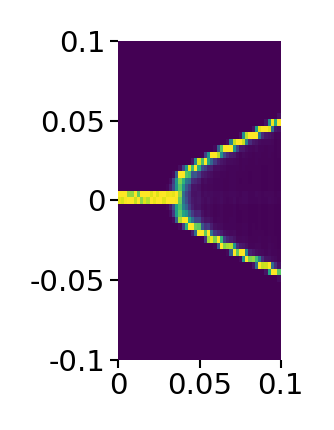

In [6]:
plt.style.use('paper')
Speeds = np.arange(1.0,1.01,0.25)

Rotate=False
Results_new = deepcopy(Results)
y = np.linspace(0,1000,50)

matplotlib.rcParams.update({'font.size': 8})

iLRDs = len(s_lrds)
if Rotate:
    fig1, ax1 = plt.subplots(nrows=1,ncols=len(Speeds),sharex=True,sharey=True,figsize=(6.5/5.*len(Speeds),3.15/5.))
    ax1.invert_yaxis()  # Invert y axis
else:
    fig1, ax1 = plt.subplots(nrows=1,ncols=len(Speeds),sharex=True,sharey=True,figsize=(0.55*len(Speeds),1.18))
ifig = 1


AllBranchPlots = []

for ispeed,speed in enumerate(Speeds):

    Result_filter = np.zeros((50,iLRDs))
    for ilrd, lrd in enumerate(s_lrds):
    
        aaa = np.mean(Results_new[:,:,ilrd,ispeed],axis=1)
        Result_filter[:,ilrd] =  (aaa - np.min(aaa))/(np.max(aaa) - np.min(aaa))

    x = np.append(s_lrds,s_lrds[-1]+np.diff(s_lrds)[0])

    z = Result_filter

    if Rotate:
        ax1.pcolor(y,x,z.T,rasterized=True)

    else:
        ax1.pcolor(x,y,z,rasterized=True)

    AllBranchPlots.append(Result_filter)
    TLabel = []
    x1 = x
    y1 = x1/2.0
    y2 = -y1

    ax1.tick_params(pad=1)

    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    
    ax1.set_xticks([0,255,510])
    ax1.set_xticklabels(['0','0.05','0.1'])
    ax1.set_yticks([0,250,500,750,1000])
    ax1.set_yticklabels(['-0.1','-0.05','0','0.05','0.1'])
    ax1.axis('equal')


if Rotate:
    fig1.text(0.5,-0.35, r'$LRD_{RealFish_to_Center}$ (m)', ha="center", va="center",fontsize = 8)
    fig1.text(0.07,0.5, r'$LRD_{VirtualFish}$ (m)', ha="center", va="center", rotation=90,fontsize = 8)
else:
    fig1.subplots_adjust(left=0.01, right=1,  bottom=0.1,  top=1.0, wspace=0.1, hspace=0)
fig1.show()
